In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [6]:
dir = "/content/drive/MyDrive/IIITD/Winter 2021/ML/"

In [2]:
import pandas as pd
from os.path import join
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [134]:
def remove_punctuation_stop_words(text):
  ps = nltk.PorterStemmer()
  word_tokenizer = RegexpTokenizer(r'\w+')
  stop_words_list = stopwords.words('english')
  text_tokenized = word_tokenizer.tokenize(text)
  text_mod = [ps.stem(word) for word in text_tokenized if word not in stop_words_list]
  return " ".join(text_mod)


In [143]:
data = pd.read_excel(join(dir,"Q3Dataset.xlsx"))
X = data.Column1
Y = data.Column2

In [144]:
X = X.apply(lambda x: x.lower())
X = X.apply(remove_punctuation_stop_words)

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [166]:
vectorizer_TFIDF = TfidfVectorizer(ngram_range = (1,2),min_df=0.00,max_df=1.0,norm="l2")

In [167]:
fitted_tfidf = vectorizer_TFIDF.fit(X)

In [169]:
x_train = fitted_tfidf.transform(x_train)
x_test = fitted_tfidf.transform(x_test)

In [170]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.toarray())
x_test = scaler.fit_transform(x_test.toarray())

In [177]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[5,10,15],'gamma':[1,5,'auto','scale']}
svc = SVC()
grid = GridSearchCV(svc, parameters,n_jobs=-1,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  9.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [5, 10, 15], 'gamma': [1, 5, 'auto', 'scale'],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [157]:
grid.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
grid.best_score_

In [178]:
import pandas as pd
pd.DataFrame(grid.cv_results_).to_csv(dir+"grid_search_results.csv",index=False)

In [179]:
clf= SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.795

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(x_test))

array([[83, 17],
       [24, 76]])

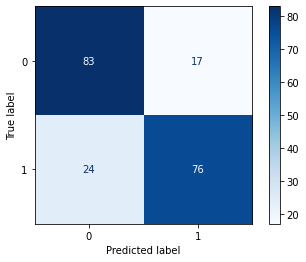

In [183]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test,cmap= "Blues")  

In [184]:
from sklearn.metrics import f1_score
f1_score(y_test, clf.predict(x_test))

0.7875647668393783